### Visualize Luminance Calibration Effect

In [20]:
%matplotlib widget
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os

from PIL import Image
import sys  
sys.path.insert(0, '../dip_utils')

from matrix_utils import arr_info
from vis_utils import (vis_rgb_cube,
                       vis_hists,
                       vis_pair)
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
%run ../scripts/image_stacking.ipynb
%run ../scripts/calibrate.ipynb

In [21]:
path = '../field_test/'
dest = 'vis_images/'

In [22]:
files = glob.glob('%s/*' % dest)
for f in files:
    os.remove(f)

In [23]:
image_stacking(path, dest)

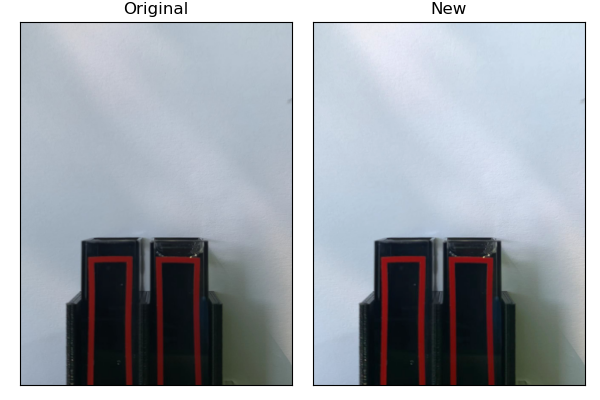

In [24]:
I = plt.imread('vis_images/NTU3_18.jpg')
clear = '../stacked_new/NTU0.jpg'
J = lab_trans(clear, I)
vis_pair(I, J)

In [25]:
plt.savefig('../assets/calibrated.pdf', dpi=600)

In [26]:
x1 = 160
x2 = 340
y1 = 810
y2 = 990

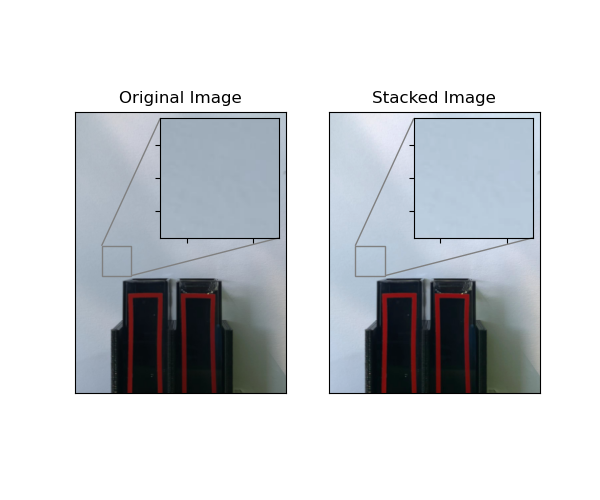

In [27]:
f, ax = plt.subplots(1,2,figsize=(6,5), sharex=True, sharey=True)
ax[0].imshow(I)
ax[0].set_title('Original Image')
ax[1].imshow(J)
ax[1].set_title('Stacked Image')
axinsl = zoomed_inset_axes(ax[0], 4, loc=1)
axinsl.imshow(I)
axinsl.set_xlim(x1, x2)
axinsl.set_ylim(y1, y2)
mark_inset(ax[0], axinsl, loc1=2, loc2=4, fc="none", ec="0.5")
plt.xticks(visible=False)
plt.yticks(visible=False)
axinsr = zoomed_inset_axes(ax[1], 4, loc=1)
axinsr.imshow(J)
axinsr.set_xlim(x1, x2)
axinsr.set_ylim(y1, y2)
mark_inset(ax[1], axinsr, loc1=2, loc2=4, fc="none", ec="0.5")
ax[0].tick_params(
    axis='both',         
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False) 
ax[1].tick_params(
    axis='both',         
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False) 
[a.axes.get_xaxis().set_visible(False) for a in ax];
[a.axes.get_yaxis().set_visible(False) for a in ax];
plt.xticks(visible=False)
plt.yticks(visible=False)
plt.draw()
plt.show()

In [28]:
plt.savefig('../assets/calibrated_zoom.pdf', dpi=600)